### Import our popular library to read and manipulate our dataset..

In [3]:
import pandas as pd

### Ok, Now read the data
#### it's name is 'gender_classification' and it's extension 'csv'

In [4]:
df = pd.read_csv("gender_classification.csv")

### Look at first 5 rows of data


In [5]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


***We see all columns except forehead_width_cm and forehead_height_cm are already encoded (except gender) Categorical features
forehead_width_cm and forehead_height_cm are numerical features***
### Let us encode the gender column where 0 = Female, and 1 = Male manually..

In [6]:
# dataset['gender'] = dataset.gender.eq("Male").mul(1)

df['gender'] = df['gender'].replace({'Male':1,'Female':0})

In [7]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


### Now plz check the datatype of all the columns

In [8]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                         int64
dtype: object

**Ok, The dtypes are as expected. Let's see if there are any NaN values?.**

In [9]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

***This is great news, as we do not need to do any data cleaning regarding NaN values.***

### Check if columns forehead_width_cm and forehead_height_cm contain non-sensical values, such as x <=0 for all x $\in R^{+}$.

In [10]:
print(any(df.forehead_width_cm <= 0))
print(any(df.forehead_height_cm <= 0))

False
False


### See more data about dataset's numerical features

In [11]:
print(df.forehead_width_cm.describe())
print("")
print(df.forehead_height_cm.describe())

count    5001.000000
mean       13.181484
std         1.107128
min        11.400000
25%        12.200000
50%        13.100000
75%        14.000000
max        15.500000
Name: forehead_width_cm, dtype: float64

count    5001.000000
mean        5.946311
std         0.541268
min         5.100000
25%         5.500000
50%         5.900000
75%         6.400000
max         7.100000
Name: forehead_height_cm, dtype: float64


## Let's create our ML model.

### Assign data into predictive features (X) and the predicted feature (y)

In [12]:
# X = dataset.iloc[:,:-1]
X = df.iloc[:,0:7]
y = df.iloc[:,-1]

### Splitting the dataset into the Training set and Test set


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### import your LogisticRegression Algo

In [14]:
from sklearn.linear_model import LogisticRegression

### Take an object then fit your (X_train,y_train)

In [15]:
LG = LogisticRegression()
LG.fit(X_train,y_train)

LogisticRegression()

### Predict on the test set


In [16]:
y_pred = LG.predict(X_test)

### What about score of traing and test?

In [17]:
LG_Train_Score = LG.score(X_train,y_train)
LG_Test_Score = LG.score(X_test,y_test)
print("Model's training accuracy = " + str(round(LG_Train_Score,2)))
print("Model's test accuracy = " + str(round(LG_Test_Score,2)))

Model's training accuracy = 0.97
Model's test accuracy = 0.97


### Ok, Now Import the confusion_matrix, take an object then print it

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[622  20]
 [ 21 588]]


### What about turn it into heatmap?

<AxesSubplot:>

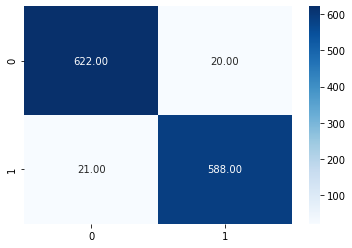

In [21]:
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='.2f',cmap='Blues')

### Your Precisition and Recall ?

In [22]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9671052631578947
0.9655172413793104


### what if conluse all these measures steps in one report?

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       642
           1       0.97      0.97      0.97       609

    accuracy                           0.97      1251
   macro avg       0.97      0.97      0.97      1251
weighted avg       0.97      0.97      0.97      1251



**Thanks For Trying**